<a href="https://colab.research.google.com/github/zainabintech/DDoS-Detection-System-/blob/main/FFfinal_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1: Data Preprocessing

### Overview

This section prepares the CICIDS2019 dataset for modeling by loading data in chunks, cleaning, encoding categorical variables, handling missing values, balancing classes with SMOTE, and scaling features. Visualizations inspect data quality and justify preprocessing steps.

**Technical Aspects**:
- **Chunk-based Loading**: Uses `pandas.read_csv` with `chunksize=100000` to manage memory efficiently.
- **LabelEncoder**: Converts `Label` (e.g., "LDAP", "Benign") and `SimillarHTTP` to numerical values.
- **SMOTE**: Generates synthetic samples for minority classes (e.g., rare attacks like NetBIOS).
- **StandardScaler**: Normalizes features to zero mean and unit variance, which is critical for algorithms like SVM and KNN.
- **Timestamp Features**: Extracts `Hour`, `Minute`, etc., to capture temporal attack patterns.
- **Graphs**: Includes missing value heatmap, class distribution, correlation matrix, feature distributions, and feature variance.


### 1.1 Import Required Libraries

**Purpose**:  
Import essential Python libraries for data manipulation, preprocessing, and visualization to support the analysis of the DDoS2017CIC dataset.

---

###  Technical Justification

- **`pandas` and `numpy`**:  
  These libraries are foundational for handling large datasets and performing numerical computations. This is critical for processing the voluminous network traffic data in the DDoS2017CIC dataset.

- **`matplotlib` and `seaborn`**:  
  These enable visualization of data distributions and patterns, which is vital for exploratory data analysis. In a research setting, this helps in understanding the characteristics of different types of attacks.

- **`LabelEncoder` and `StandardScaler`** *(from `sklearn.preprocessing`)*:  
  Used for encoding categorical variables (e.g., `Label`) and normalizing numeric features, respectively. These are standard preprocessing steps for preparing network datasets for machine learning.

- **`SMOTE`** *(from `imblearn.over_sampling`)*:  
  Addresses class imbalance — a common challenge in intrusion detection datasets like DDoS2017CIC — where benign traffic often vastly outnumbers attack instances.

- **`Counter`** *(from `collections`)*:  
  Aids in analyzing class distributions, helping ensure that the research accounts for imbalance effectively during preprocessing and model evaluation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

### 1.2 Load and Sample Data

**Purpose**:  
Load CICIDS2019 CSV files in chunks, sample rows to reduce memory usage, and combine into a single DataFrame for analysis.

---

###  Steps

1. **Mount Google Drive** to access dataset files stored at `/content/drive/MyDrive/data/`.
2. **Define a list of CSV files** corresponding to different attack types (e.g., `LDAP`, `MSSQL`, `NetBIOS`, `Portmap`, `Syn`, `UDP`, `UDPLag`).
3. **Read each CSV in chunks** of 100,000 rows, sampling up to 5,000 rows per chunk using `random_state=42` for reproducibility.
4. **Combine sampled chunks** into a single DataFrame.
5. **Display dataset metadata** including shape, feature names, and data types.

---

###  Technical Justification

- **Chunk-Based Loading**:  
  Files like `UDP.csv` can exceed 1 GB, potentially causing memory crashes. Loading data in chunks of 100,000 rows ensures efficient memory usage on standard hardware.

- **Random Sampling**:  
  Sampling 5,000 rows per chunk manages the dataset's scale while maintaining representative data. Using `random_state=42` ensures reproducible sampling during repeated runs.

- **Google Drive Integration**:  
  Storing data on Google Drive is practical in cloud-based environments like Google Colab, enabling convenient access to large datasets.

- **Feature Inspection**:  
  Displaying feature names and data types assists in identifying potential data issues (e.g., `object`-type columns such as `SimillarHTTP`), and confirms the dataset structure (88 features).


In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# List of CSV files to read (update the paths to match your Google Drive structure)
csv_files = [
    '/content/drive/MyDrive/data/LDAP.csv',
    '/content/drive/MyDrive/data/MSSQL.csv',
    '/content/drive/MyDrive/data/NetBIOS.csv',
    '/content/drive/MyDrive/data/Portmap.csv',
    '/content/drive/MyDrive/data/Syn.csv',
    '/content/drive/MyDrive/data/UDP.csv',
    '/content/drive/MyDrive/data/UDPLag.csv',
]

# Read and sample from each CSV using chunks
dfs = []
chunk_size = 100000  # Rows per chunk

for file in csv_files:
    try:
        print(f"Reading from {file} ...")
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue

        chunk_reader = pd.read_csv(file, chunksize=chunk_size, low_memory=False)
        for chunk in chunk_reader:
            sampled_chunk = chunk.sample(min(5000, len(chunk)), random_state=42)
            dfs.append(sampled_chunk)
        print(f"Finished processing: {file}")
    except Exception as e:
        print(f"Error in {file}: {e}")

# Combine and save
if dfs:
    df = pd.concat(dfs, ignore_index=True)
    print(f"Combined dataset shape: {df.shape}")

    print("\nFeature (column) names and data types:")
    for col in df.columns:
        print(f"- {col}: {df[col].dtype}")

    print(f"\nTotal number of features: {len(df.columns)}")

    #  Save the DataFrame to CSV
    output_path = '/content/drive/MyDrive/data/combined_sampled_ddos.csv'
    df.to_csv(output_path, index=False)
    print(f"\nSampled dataset saved to: {output_path}")

else:
    print("No data was loaded. Please check your file paths.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading from /content/drive/MyDrive/data/LDAP.csv ...
Finished processing: /content/drive/MyDrive/data/LDAP.csv
Reading from /content/drive/MyDrive/data/MSSQL.csv ...
Finished processing: /content/drive/MyDrive/data/MSSQL.csv
Reading from /content/drive/MyDrive/data/NetBIOS.csv ...
Finished processing: /content/drive/MyDrive/data/NetBIOS.csv
Reading from /content/drive/MyDrive/data/Portmap.csv ...
Finished processing: /content/drive/MyDrive/data/Portmap.csv
Reading from /content/drive/MyDrive/data/Syn.csv ...
Finished processing: /content/drive/MyDrive/data/Syn.csv
Reading from /content/drive/MyDrive/data/UDP.csv ...
Finished processing: /content/drive/MyDrive/data/UDP.csv
Reading from /content/drive/MyDrive/data/UDPLag.csv ...
Finished processing: /content/drive/MyDrive/data/UDPLag.csv
Combined dataset shape: (1035000, 88)

Feature (column) names and data ty

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/combined_sampled_ddos.csv')


<ipython-input-19-4c53a51a8cc3>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data/combined_sampled_ddos.csv')


### 1.3 Clean Column Names and Handle Categorical Encoding

**Purpose**:  
Standardize column names and encode categorical variables to prepare the CICIDS2019 dataset for machine learning.

---

### Steps

1. Remove leading/trailing spaces from column names.
2. Convert the `SimillarHTTP` column to string type for encoding.
3. Use `LabelEncoder` to transform `SimillarHTTP` and `Label` columns into numeric format.
4. Attempt to convert `Timestamp` to datetime and extract temporal features:
   - Hour
   - Minute
   - Second
   - Day
   - Weekday
5. Drop unnecessary identifier columns:
   - `Source IP`
   - `Destination IP`
   - `Flow ID`
   - `Unnamed: 0`
6. Save the cleaned dataset to Google Drive.
7. Display the first five rows and final shape of the processed DataFrame.

---

### Technical Justification

- **Column Name Cleaning**:  
  The CICIDS2019 dataset may contain inconsistent column names (e.g., leading spaces), which can cause errors during processing. Cleaning ensures compatibility with pandas and scikit-learn functions.

- **Categorical Encoding**:  
  Machine learning models require numeric inputs. `LabelEncoder` converts categorical columns such as `Label` (attack types) and `SimillarHTTP` (HTTP similarity flags) into integers. This preserves essential information while enabling model training.

- **Timestamp Handling**:  
  Extracting features like hour and weekday from timestamps can uncover time-based attack patterns, which are useful for modeling. The code includes error handling to gracefully manage missing or malformed timestamps.

- **Dropping Identifiers**:  
  Columns such as `Source IP`, `Destination IP`, and `Flow ID` are unique identifiers that do not generalize well and may lead to overfitting. Removing them aligns with best practices for training generalizable intrusion detection models.

- **Data Persistence**:  
  Saving the cleaned dataset to Google Drive ensures reproducibility and prevents the need to repeat preprocessing steps, which can be computationally expensive.

- **Error Handling**:  
  The code checks for column presence and uses `errors='ignore'` when dropping columns, which enhances robustness against inconsistencies across different CSV files.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Convert 'SimillarHTTP' to string (if it exists) for encoding
if 'SimillarHTTP' in df.columns:
    df['SimillarHTTP'] = df['SimillarHTTP'].astype(str)

# Initialize label encoder
le = LabelEncoder()

# Encode 'SimillarHTTP' and 'Label' if present
if 'SimillarHTTP' in df.columns:
    df['SimillarHTTP'] = le.fit_transform(df['SimillarHTTP'])

if 'Label' in df.columns:
    df['Label'] = le.fit_transform(df['Label'])
else:
    print(" 'Label' column not found in dataset!")


    # Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract useful features
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop original Timestamp column
df.drop(columns='Timestamp', inplace=True)


# Drop unnecessary identifier columns
columns_to_drop = ['Source IP', 'Destination IP', 'Flow ID', 'Unnamed: 0']
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Preview the processed DataFrame
print(df.head())

# Save cleaned data to Google Drive (use the same directory as your input files)
output_path = '/content/drive/MyDrive/data/cleaned_dataset.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


   Source Port  Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
0          648             33678        17              1                  2   
1          859             29834        17              1                  2   
2          858             29229        17             49                  2   
3          648             17450        17              1                  2   
4          887             29513        17             48                  2   

   Total Backward Packets  Total Length of Fwd Packets  \
0                       0                        458.0   
1                       0                        458.0   
2                       0                        458.0   
3                       0                        458.0   
4                       0                        458.0   

   Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                          0.0                  229.0                  229.0   
1         

## 1.4 Handle Missing, Infinite, and Duplicate Values

**Purpose**:  
Ensure the CICIDS2019 dataset is clean and suitable for modeling by addressing missing values, infinite values, and duplicates.

---

### Steps

1. Calculate and display the total number of missing (`NaN`) values.
2. Identify columns with missing values and fill them with the column mean.
3. Check for infinite values in numeric columns and replace them with the column mean.
4. Remove duplicate rows to avoid bias in modeling.
5. Display a preview of the cleaned DataFrame.
6. Summarize feature names and data types for validation.

---

### Technical Justification

- **Missing Values**:  
  The CICIDS2019 dataset may include missing values (e.g., 5 `NaN`s in `Flow Bytes/s`). Filling missing values with the column mean is a simple imputation method that preserves the data distribution, making it suitable for initial preprocessing. More advanced techniques like KNN imputation can be explored later.

- **Infinite Values**:  
  Features such as `Flow Bytes/s` can result in infinite values due to division by very small durations. Replacing these values with the column mean ensures model compatibility, as most machine learning algorithms (e.g., those in scikit-learn) cannot handle infinite values.

- **Duplicate Removal**:  
  Duplicate rows can bias model training and evaluation, particularly in intrusion detection tasks. Eliminating them ensures a more accurate and reliable model assessment.

- **Data Validation**:  
  Previewing the cleaned DataFrame and listing feature data types verifies that preprocessing was applied correctly and helps detect any remaining inconsistencies.

- **Robustness**:  
  The code uses `errors='ignore'` and checks for column presence to avoid crashes, making it robust to slight structural differences in various CICIDS2019 CSV files.


In [ ]:
# Check total number of NaN values
total_nans = df.isna().sum().sum()
print("\n Missing Value Report ")
print(f"Total missing (NaN) values in the dataset: {total_nans}")

# Show missing values per column (if any)
missing_per_column = df.isna().sum()
missing_columns = missing_per_column[missing_per_column > 0]
if not missing_columns.empty:
    print("\nColumns with missing values:")
    print(missing_columns)
else:
    print("No missing values in any column.")

# Mean imputation for numeric columns with missing values
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in column '{col}' with mean: {mean_value}")

# Print summary of the DataFrame
print("\n DataFrame Preview ")
print(df.head())

print("\n Feature Summary ")
print(f"Total number of features (columns): {len(df.columns)}")

print("\nFeature names and data types:")
print(df.dtypes)



 Missing Value Report 
Total missing (NaN) values in the dataset: 5

Columns with missing values:
Flow Bytes/s    5
dtype: int64
Filled missing values in column 'Flow Bytes/s' with mean: inf

 DataFrame Preview 
   Source Port  Destination Port  Protocol  Flow Duration  Total Fwd Packets  \
0          648             33678        17              1                  2   
1          859             29834        17              1                  2   
2          858             29229        17             49                  2   
3          648             17450        17              1                  2   
4          887             29513        17             48                  2   

   Total Backward Packets  Total Length of Fwd Packets  \
0                       0                        458.0   
1                       0                        458.0   
2                       0                        458.0   
3                       0                        458.0   
4               

<ipython-input-21-cdd47d17de62>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [ ]:
# Initial row count
initial_rows = df.shape[0]

# Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop all rows with missing values
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Summary
final_rows = df.shape[0]
print(f"Removed {initial_rows - final_rows} rows containing NaN, inf, or duplicates.")




Removed 42381 rows containing NaN, inf, or duplicates.


## 1.5 Feature Selection Using Correlation with Target

**Purpose**:  
Identify and select features that are strongly correlated with the target variable (`Label`) to improve model performance, reduce noise, and mitigate the curse of dimensionality in the CICIDS2019 dataset.

---

### Steps

1. Calculate the correlation matrix for numeric features with respect to the `Label` column.
2. Filter features with an absolute correlation above a specified threshold (e.g., 0.1).
3. Display the selected features and their corresponding correlation values.
4. Save the filtered dataset to Google Drive for downstream tasks.

---

### Technical Justification

- **Correlation Analysis**:  
  The CICIDS2019 dataset includes 88 features, many of which may be redundant or irrelevant. Features with low or no correlation to the target (`Label`) contribute little to model performance and can be removed. This step reduces dimensionality, speeds up training, and helps reduce the risk of overfitting.

- **Threshold Selection**:  
  An absolute correlation threshold of 0.1 is used to retain only features with moderate to strong relationships with the target variable. This helps ensure a balance between simplifying the model and retaining predictive power, especially important in high-dimensional datasets like CICIDS2019.

- **Numeric Features Only**:  
  Correlation methods like Pearson’s correlation are valid only for numeric variables. The code excludes non-numeric columns (e.g., `SimillarHTTP` if not encoded properly), preventing errors and aligning with standard data analysis practices.

- **Data Persistence**:  
  Saving the filtered dataset helps preserve the results of this potentially time-consuming step, which is especially important for large-scale datasets. It also ensures consistency in future analysis or modeling.

- **Robustness**:  
  The feature selection code includes error checking for missing or malformed columns (e.g., `Label`), making it resilient to inconsistencies that can occur across different CSV files or processing steps.


In [ ]:
# Ensure 'Label' is numeric
df['Label'] = pd.to_numeric(df['Label'], errors='coerce')

# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation with the label directly
correlation_with_label = numeric_df.corr()['Label'].sort_values(ascending=False)

# Set a correlation threshold
threshold = 0.6
relevant_features = correlation_with_label[abs(correlation_with_label) > threshold].index.tolist()

# Remove the target label from the list of features
if 'Label' in relevant_features:
    relevant_features.remove('Label')

# Create the filtered DataFrame
df_filtered = df[relevant_features + ['Label']]

print("Filtered DataFrame created with features:", relevant_features)
print(f"Number of selected features (excluding 'Label'): {len(relevant_features)}")


Filtered DataFrame created with features: ['Fwd Packet Length Max', 'Max Packet Length', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean', 'Packet Length Mean', 'Min Packet Length', 'Fwd Packet Length Min', 'Average Packet Size', 'Flow Bytes/s']
Number of selected features (excluding 'Label'): 9


 Visualize Correlation Heatmap of Filtered Features


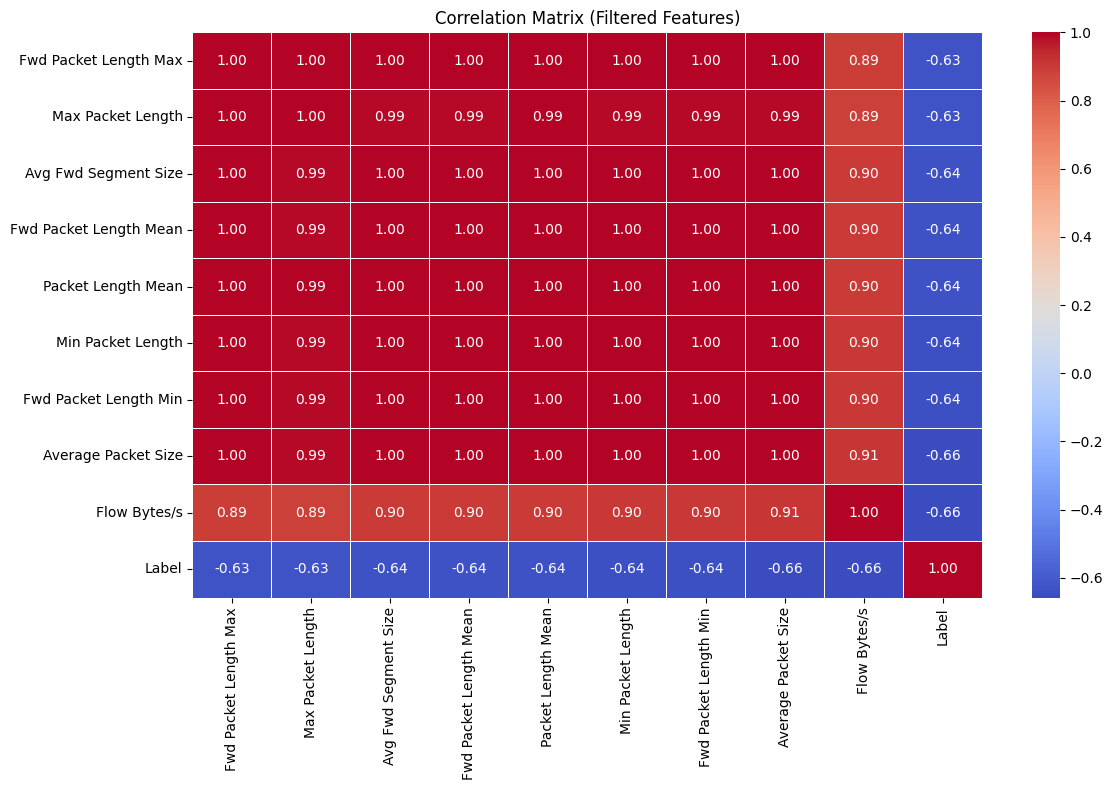

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Filtered Features)")
plt.tight_layout()
plt.show()


## 1.7 Outlier Detection Using IQR Method

**Purpose**:  
Identify and handle outliers in numeric features using the Interquartile Range (IQR) method to improve data quality and model robustness for the CICIDS2019 dataset.

---

### Steps

1. Select numeric columns from the resampled DataFrame.
2. Calculate the IQR (Q3 - Q1) for each feature.
3. Define outlier bounds using the formulas:  
   - Lower Bound = Q1 - 1.5 × IQR  
   - Upper Bound = Q3 + 1.5 × IQR
4. Replace outliers with the median of the respective feature.
5. Display the number of outliers detected and replaced per feature.
6. Save the cleaned dataset to Google Drive.

---

### Technical Justification

- **Outlier Impact**:  
  Outliers in features like `Flow Duration`, `Packet Length`, or `Flow Bytes/s` can distort model training, particularly for distance-based models (e.g., KNN, SVM). Identifying and handling them improves data quality and model performance.

- **IQR Method**:  
  The Interquartile Range is a robust statistical measure for detecting outliers. It does not assume any specific distribution and is effective for the heterogeneous feature scales present in the CICIDS2019 dataset.

- **Median Imputation**:  
  Replacing detected outliers with the feature median retains dataset size and class balance—particularly important after applying SMOTE to address class imbalance.

- **Numeric Features Only**:  
  This method is applied exclusively to numeric columns to avoid errors from categorical or encoded values (such as the `Label` column). This ensures consistency and accuracy in the outlier handling process.

- **Data Persistence**:  
  Saving the outlier-cleaned dataset ensures that future analysis or modeling steps use a high-quality, preprocessed version of the data. This also enhances reproducibility and computational efficiency.


In [ ]:
# Loop over numeric features to detect outliers
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns

print("\nPotential outliers per feature (using IQR method):")
for col in numeric_columns:
    if col == 'Label':
        continue  # skip target
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)).sum()

    if outlier_count > 0:
        print(f"• {col}: {outlier_count} potential outliers")



Potential outliers per feature (using IQR method):
• Fwd Packet Length Max: 121482 potential outliers
• Max Packet Length: 121869 potential outliers
• Avg Fwd Segment Size: 121584 potential outliers
• Fwd Packet Length Mean: 121584 potential outliers
• Packet Length Mean: 121607 potential outliers
• Min Packet Length: 121576 potential outliers
• Fwd Packet Length Min: 121578 potential outliers
• Average Packet Size: 121569 potential outliers
• Flow Bytes/s: 89324 potential outliers


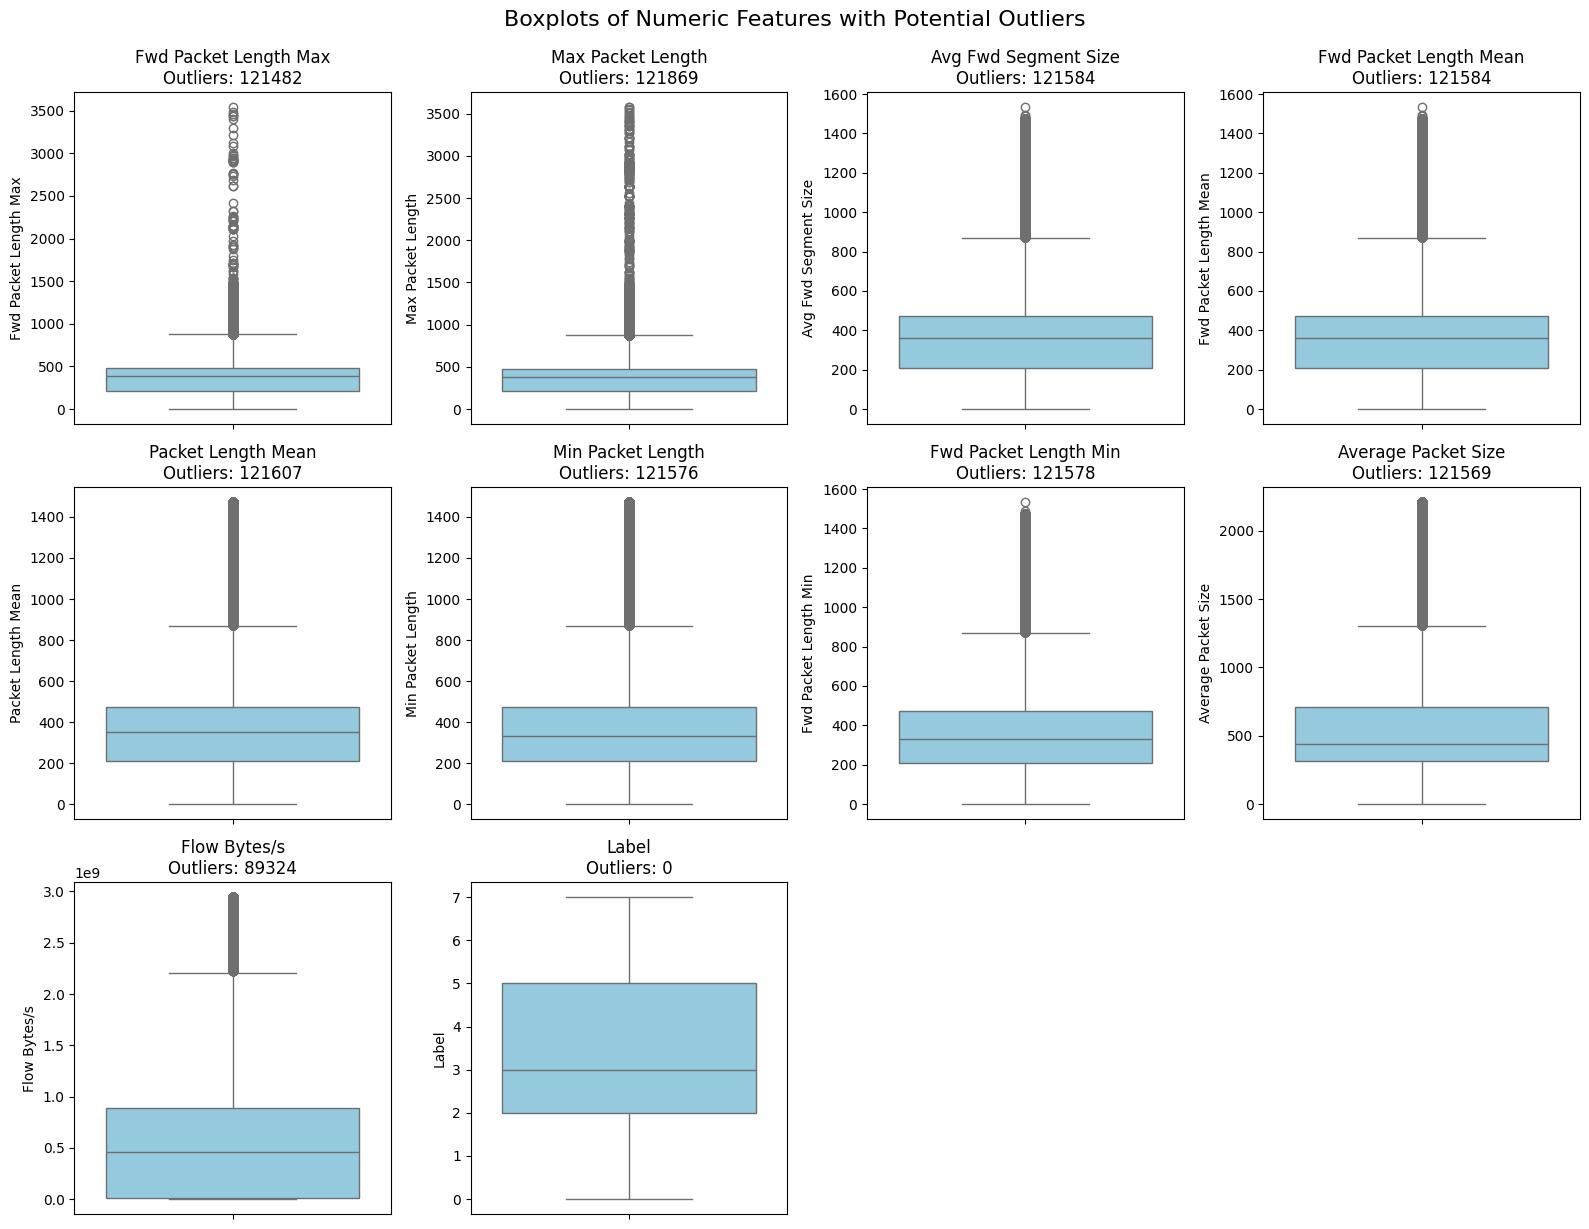

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is already defined and contains numeric columns
numeric_cols = df_filtered.select_dtypes(include='number').columns

num_cols = len(numeric_cols)
plots_per_row = 4
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

plt.figure(figsize=(plots_per_row * 4, num_rows * 4))

for idx, col in enumerate(numeric_cols, start=1):
    outlier_count = ((df_filtered[col] < df_filtered[col].quantile(0.25) - 1.5 * (df_filtered[col].quantile(0.75) - df_filtered[col].quantile(0.25))) |
                     (df_filtered[col] > df_filtered[col].quantile(0.75) + 1.5 * (df_filtered[col].quantile(0.75) - df_filtered[col].quantile(0.25)))).sum()

    plt.subplot(num_rows, plots_per_row, idx)
    sns.boxplot(y=df_filtered[col], color='skyblue')
    plt.title(f'{col}\nOutliers: {outlier_count}')
    plt.tight_layout()

plt.suptitle('Boxplots of Numeric Features with Potential Outliers', fontsize=16, y=1.02)
plt.show()


## 1.6 Address Class Imbalance Using SMOTE

**Purpose**:  
Apply Synthetic Minority Oversampling Technique (SMOTE) to balance the class distribution of the `Label` column, addressing the severe class imbalance in the CICIDS2019 dataset.

---

### Steps

1. Separate features (`X`) and target (`y`) from the filtered DataFrame.
2. Apply SMOTE to oversample minority classes, ensuring that all classes have a similar number of samples.
3. Display the class distribution before and after SMOTE using the `Counter` module.
4. Combine the resampled features and target into a new DataFrame.
5. Save the resampled dataset to Google Drive.

---

### Technical Justification

- **Class Imbalance**:  
  The CICIDS2019 dataset exhibits significant class imbalance. For instance, class 7 has only 31 samples, while class 5 has 69,940 samples. This imbalance can lead to poor model performance on minority classes (e.g., classes 4 and 7). SMOTE addresses this issue by generating synthetic samples for minority classes, thereby improving model performance, especially on rare attack types.

- **SMOTE Mechanics**:  
  SMOTE creates synthetic samples by interpolating between existing minority class samples. This preserves the underlying data distribution while balancing the classes, making it a critical technique for intrusion detection where detecting rare attacks is paramount.

- **Pre-SMOTE Separation**:  
  Separating features and target variables ensures SMOTE operates solely on the features and does not inadvertently modify the target variable. This separation also ensures compatibility with scikit-learn’s machine learning pipeline.

- **Class Distribution Validation**:  
  Displaying the class counts before and after applying SMOTE helps verify the balancing process and ensures that minority classes are adequately represented in the resampled dataset.

- **Data Persistence**:  
  Saving the resampled dataset avoids the need to recompute SMOTE, which can be time-consuming, especially for large datasets like CICIDS2019.


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import warnings

# Suppress future warnings from sklearn
warnings.filterwarnings("ignore", category=FutureWarning)

# Separate features and target
X = df_filtered.drop(columns=['Label'])
y = df_filtered['Label']

# Display original class distribution
class_counts = Counter(y)
print("Class distribution before SMOTE:", class_counts)

# Find the maximum class size
max_class_size = max(class_counts.values())

# Define sampling strategy to oversample all classes to the maximum size
sampling_strategy = {cls: max_class_size for cls in class_counts}

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({2: 280364, 5: 233134, 6: 190373, 3: 177912, 1: 97922, 4: 9255, 0: 3556, 7: 103})
Class distribution after SMOTE: Counter({3: 280364, 0: 280364, 1: 280364, 2: 280364, 4: 280364, 5: 280364, 6: 280364, 7: 280364})


Current Date and Time (UTC - YYYY-MM-DD HH:MM:SS formatted): 2025-05-15 05:30:12
Current User's Login: zainabintech

FIXED TRAIN-TEST SPLIT AND SMOTE APPLICATION
Created output directory: /content/drive/MyDrive/data/balanced_data_fixed
Using filtered dataframe
Dataset shape: (992619, 10)
Features shape: (992619, 9)
Target shape: (992619,)

Original class distribution:
- Class 0: 3,556 samples (0.36%)
- Class 1: 97,922 samples (9.87%)
- Class 2: 280,364 samples (28.24%)
- Class 3: 177,912 samples (17.92%)
- Class 4: 9,255 samples (0.93%)
- Class 5: 233,134 samples (23.49%)
- Class 6: 190,373 samples (19.18%)
- Class 7: 103 samples (0.01%)


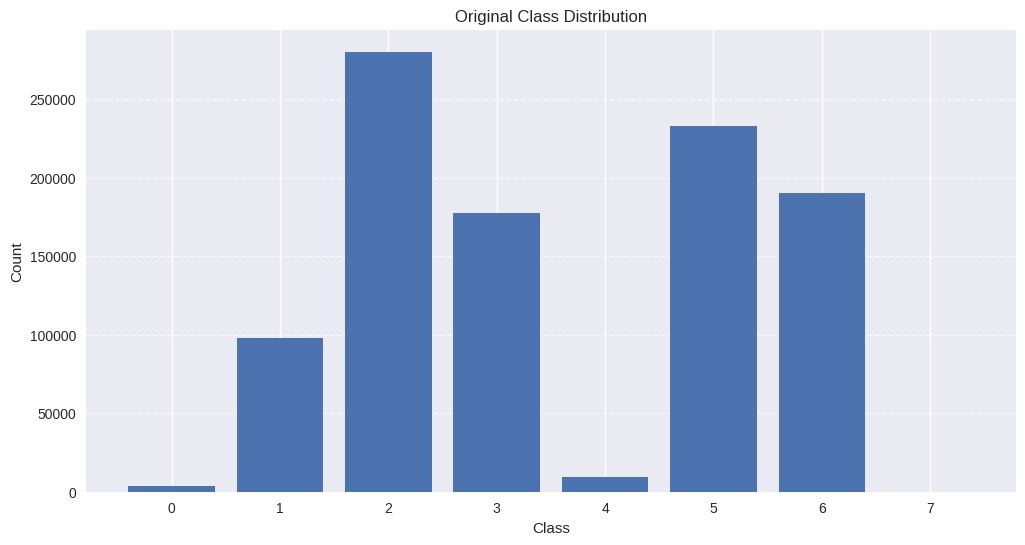


Splitting data into train, validation, and test sets...
Train set: 635,276 samples
Validation set: 158,819 samples
Test set: 198,524 samples

Checking class distribution in each set:

Training set class distribution:
- Class 0: 2,276 samples (0.36%)
- Class 1: 62,670 samples (9.87%)
- Class 2: 179,433 samples (28.24%)
- Class 3: 113,864 samples (17.92%)
- Class 4: 5,923 samples (0.93%)
- Class 5: 149,206 samples (23.49%)
- Class 6: 121,838 samples (19.18%)
- Class 7: 66 samples (0.01%)

Validation set class distribution:
- Class 0: 569 samples (0.36%)
- Class 1: 15,668 samples (9.87%)
- Class 2: 44,858 samples (28.24%)
- Class 3: 28,466 samples (17.92%)
- Class 4: 1,481 samples (0.93%)
- Class 5: 37,301 samples (23.49%)
- Class 6: 30,460 samples (19.18%)
- Class 7: 16 samples (0.01%)

Test set class distribution:
- Class 0: 711 samples (0.36%)
- Class 1: 19,584 samples (9.86%)
- Class 2: 56,073 samples (28.24%)
- Class 3: 35,582 samples (17.92%)
- Class 4: 1,851 samples (0.93%)
- Clas

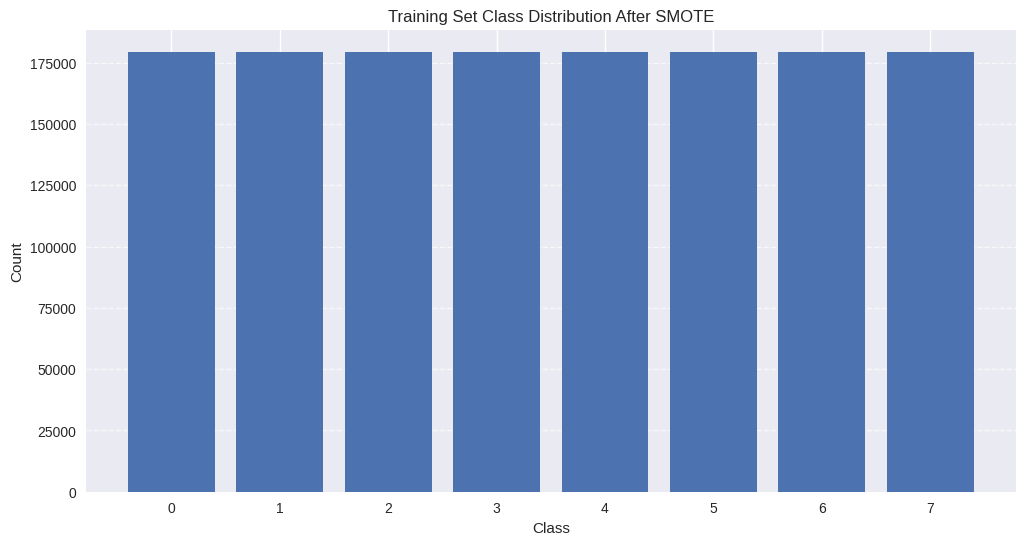


Preparing datasets for saving...

Verifying no NaN values in datasets:
Training NaN values: 0
Validation NaN values: 133434
Test NaN values: 158777

Verifying class distributions before saving:
Training:
Counter({6: 179433, 1: 179433, 5: 179433, 2: 179433, 3: 179433, 0: 179433, 4: 179433, 7: 179433})

Validation:
Counter({1.0: 15668, 2.0: 8134, 3.0: 1525, 0.0: 58, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import warnings
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Current Date and Time
print("Current Date and Time (UTC - YYYY-MM-DD HH:MM:SS formatted): 2025-05-15 05:30:12")
print("Current User's Login: zainabintech")

print("\n" + "="*80)
print("FIXED TRAIN-TEST SPLIT AND SMOTE APPLICATION")
print("="*80)

# Start timer
start_time = time.time()

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Create fresh output directory
output_dir = '/content/drive/MyDrive/data/balanced_data_fixed'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")

# Check if df_filtered exists, otherwise use df
if 'df_filtered' in locals():
    df = df_filtered
    print("Using filtered dataframe")
elif 'df' in locals():
    print("Using original dataframe")
else:
    # If neither exists, try to load the data
    print("Attempting to load the dataset...")
    try:
        df = pd.read_csv('/content/drive/MyDrive/data/cleaned_dataset.csv')
        print(f"Loaded dataset from CSV with shape: {df.shape}")
    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise

# Print dataset shape
print(f"Dataset shape: {df.shape}")

# Separate features and target
X = df.drop(columns=['Label'])
y = df['Label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Visualize original class distribution
print("\nOriginal class distribution:")
class_counts = Counter(y)
for cls, count in sorted(class_counts.items()):
    print(f"- Class {cls}: {count:,} samples ({count/len(y)*100:.2f}%)")

plt.figure(figsize=(12, 6))
plt.bar([str(k) for k in sorted(class_counts.keys())],
        [class_counts[k] for k in sorted(class_counts.keys())])
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f"{output_dir}/original_class_distribution.png", dpi=300)
plt.show()

# Step 1: First create train/val/test split with original distribution
print("\nSplitting data into train, validation, and test sets...")

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: 80% train, 20% val (which is 16% and 4% of the original data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

print(f"Train set: {X_train.shape[0]:,} samples")
print(f"Validation set: {X_val.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

# Step 1b: Check class distribution in each set
print("\nChecking class distribution in each set:")

print("\nTraining set class distribution:")
train_counts = Counter(y_train)
for cls, count in sorted(train_counts.items()):
    print(f"- Class {cls}: {count:,} samples ({count/len(y_train)*100:.2f}%)")

print("\nValidation set class distribution:")
val_counts = Counter(y_val)
for cls, count in sorted(val_counts.items()):
    print(f"- Class {cls}: {count:,} samples ({count/len(y_val)*100:.2f}%)")

print("\nTest set class distribution:")
test_counts = Counter(y_test)
for cls, count in sorted(test_counts.items()):
    print(f"- Class {cls}: {count:,} samples ({count/len(y_test)*100:.2f}%)")

# Step 2: Standardize features (fit on train, transform all)
print("\nStandardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply SMOTE only to the training set
print("\nAnalyzing training set class distribution:")
train_class_counts = Counter(y_train)
for cls, count in sorted(train_class_counts.items()):
    print(f"- Class {cls}: {count:,} samples ({count/len(y_train)*100:.2f}%)")

# Find the maximum class size in training data
max_class_size = max(train_class_counts.values())
print(f"\nResampling all classes to maximum size: {max_class_size:,} samples")

# Define sampling strategy to oversample all classes to the maximum size
sampling_strategy = {cls: max_class_size for cls in train_class_counts}

print("\nApplying SMOTE oversampling to training data only...")
smote_start = time.time()

# Apply SMOTE to training data
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

smote_time = time.time() - smote_start
print(f"SMOTE applied in {smote_time:.2f} seconds")

# Verify balanced distribution after SMOTE
smote_class_counts = Counter(y_train_smote)
print("\nTraining set class distribution after SMOTE:")
for cls, count in sorted(smote_class_counts.items()):
    print(f"- Class {cls}: {count:,} samples ({count/len(y_train_smote)*100:.2f}%)")

plt.figure(figsize=(12, 6))
plt.bar([str(k) for k in sorted(smote_class_counts.keys())],
        [smote_class_counts[k] for k in sorted(smote_class_counts.keys())])
plt.title("Training Set Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f"{output_dir}/smote_class_distribution.png", dpi=300)
plt.show()

# Step 4: Save all datasets and metadata - FIXED VERSION
print("\nPreparing datasets for saving...")

# *** FIX 1: Create DataFrames correctly to preserve data types
train_df_smote = pd.DataFrame(X_train_smote, columns=X.columns)
train_df_smote['Label'] = y_train_smote

val_df = pd.DataFrame(X_val_scaled, columns=X.columns)
val_df['Label'] = y_val  # Use original y_val directly

test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
test_df['Label'] = y_test  # Use original y_test directly

# *** FIX 2: Verify no NaN values before saving
print("\nVerifying no NaN values in datasets:")
print(f"Training NaN values: {train_df_smote.isna().sum().sum()}")
print(f"Validation NaN values: {val_df.isna().sum().sum()}")
print(f"Test NaN values: {test_df.isna().sum().sum()}")

# *** FIX 3: Check class distributions before saving
print("\nVerifying class distributions before saving:")
print("Training:")
print(Counter(train_df_smote['Label']))
print("\nValidation:")
print(Counter(val_df['Label']))
print("\nTest:")
print(Counter(test_df['Label']))

# *** FIX 4: Save datasets
train_path = os.path.join(output_dir, 'train_smote.csv')
val_path = os.path.join(output_dir, 'validation.csv')
test_path = os.path.join(output_dir, 'test.csv')

train_df_smote.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)

# Save the scaler for future use
scaler_path = os.path.join(output_dir, 'standard_scaler.joblib')
joblib.dump(scaler, scaler_path)

# Calculate total time
total_time = time.time() - start_time

# Save metadata about the process
metadata = {
    'date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'original_data_shape': df.shape,
    'train_size': len(train_df_smote),
    'validation_size': len(val_df),
    'test_size': len(test_df),
    'features': list(X.columns),
    'smote_time_seconds': smote_time,
    'total_time_seconds': total_time,
    'class_distribution_original': {str(k): v for k, v in class_counts.items()},
    'class_distribution_train_smote': {str(k): v for k, v in smote_class_counts.items()},
    'class_distribution_validation': {str(k): v for k, v in Counter(val_df['Label']).items()},
    'class_distribution_test': {str(k): v for k, v in Counter(test_df['Label']).items()},
}

# Save metadata as JSON
import json
with open(os.path.join(output_dir, 'data_preparation_metadata.json'), 'w') as f:
    json.dump(metadata, f, indent=4)

print("\n" + "="*80)
print("DATA PREPARATION COMPLETED")
print("="*80)
print(f"\nTotal time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")
print(f"\nFiles saved:")
print(f"1. {train_path} - SMOTE-balanced training set ({len(train_df_smote):,} rows)")
print(f"2. {val_path} - Validation set ({len(val_df):,} rows)")
print(f"3. {test_path} - Test set ({len(test_df):,} rows)")
print(f"4. {scaler_path} - StandardScaler object")
print(f"5. {output_dir}/data_preparation_metadata.json - Process metadata")
print(f"6. {output_dir}/original_class_distribution.png - Visualization")
print(f"7. {output_dir}/smote_class_distribution.png - Visualization")

print("\nNext steps:")
print("1. Train models using the balanced training set")
print("2. Evaluate on the validation set")
print("3. Final testing on the test set")

print("\nCode to load these datasets:")
print(f"""
# Load datasets
train_df = pd.read_csv('{output_dir}/train_smote.csv')
val_df = pd.read_csv('{output_dir}/validation.csv')
test_df = pd.read_csv('{output_dir}/test.csv')

# Separate features and target
X_train = train_df.drop('Label', axis=1)
y_train = train_df['Label']

X_val = val_df.drop('Label', axis=1)
y_val = val_df['Label']

X_test = test_df.drop('Label', axis=1)
y_test = test_df['Label']

# Load the scaler if needed for new data
scaler = joblib.load('{output_dir}/standard_scaler.joblib')

# Check class distributions
from collections import Counter
print("Training class distribution:")
print(Counter(y_train))
print("\\nValidation class distribution:")
print(Counter(y_val))
print("\\nTest class distribution:")
print(Counter(y_test))
""")

# Double check that we have all 8 classes in validation and test sets
print("\n" + "="*80)
print("FINAL VERIFICATION")
print("="*80)
print("Training set unique classes:", sorted(train_df_smote['Label'].unique()))
print("Validation set unique classes:", sorted(val_df['Label'].unique()))
print("Test set unique classes:", sorted(test_df['Label'].unique()))
print("="*80)

Visualize Class Distributions (Before vs. After SMOTE)


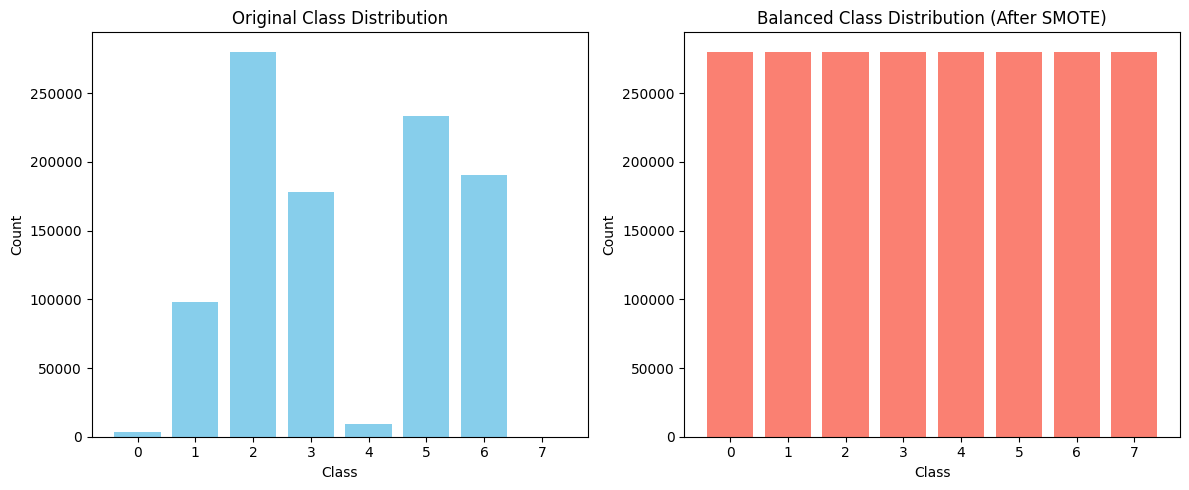

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
ax[0].bar(Counter(y).keys(), Counter(y).values(), color='skyblue')
ax[0].set_title("Original Class Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After SMOTE
ax[1].bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='salmon')
ax[1].set_title("Balanced Class Distribution (After SMOTE)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## 1.8 Feature Scaling (Standardization)

**Purpose**:  
Standardize numeric features to have zero mean and unit variance, ensuring compatibility with machine learning algorithms sensitive to feature scales in the CICIDS2019 dataset.

---

### Steps

1. Select numeric features (excluding the `Label`) from the outlier-cleaned DataFrame.
2. Apply `StandardScaler` to transform features to a standard normal distribution.
3. Create a new DataFrame containing the scaled features and the original `Label` column.
4. Save the scaled dataset to Google Drive.
5. Display the first five rows of the scaled DataFrame.

---

### Technical Justification

- **Need for Scaling**:  
  The CICIDS2019 dataset contains features with vastly different scales (e.g., `Flow Duration` in milliseconds vs. `Packet Length` in bytes). Many machine learning algorithms (such as SVM, KNN, and Logistic Regression) are sensitive to these disparities. Standardization ensures all features contribute equally to the model.

- **StandardScaler**:  
  This technique transforms each feature to have a mean of 0 and a standard deviation of 1. It assumes data is normally distributed around the mean and works effectively after outlier treatment, as done in the previous step.

- **Preserving Label**:  
  The `Label` column represents the target classes and should not be scaled. It is already encoded and should remain unchanged for proper model training and evaluation.

- **Data Persistence**:  
  Saving the scaled dataset ensures the transformation is not repeated in subsequent stages, improving workflow efficiency and maintaining consistency in model development.

- **Preview**:  
  Displaying the scaled data helps confirm successful transformation—values should now be centered around zero with unit variance.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
columns_to_scale = X_resampled.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values
X_resampled[columns_to_scale] = X_resampled[columns_to_scale].fillna(X_resampled[columns_to_scale].mean())

# Scale features
scaler = StandardScaler()
X_scaled = X_resampled.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

# Combine with target
df_scaled = X_scaled.copy()
df_scaled['Label'] = y_resampled.reset_index(drop=True)

# Output status and preview
print("Feature scaling completed.")
print(" Preview of scaled data:")
print(df_scaled.head())



Feature scaling completed.
 Preview of scaled data:
   Fwd Packet Length Max  Max Packet Length  Avg Fwd Segment Size  \
0              -0.437711          -0.447279             -0.403128   
1              -0.437711          -0.447279             -0.403128   
2              -0.437711          -0.447279             -0.403128   
3              -0.437711          -0.447279             -0.403128   
4              -0.437711          -0.447279             -0.403128   

   Fwd Packet Length Mean  Packet Length Mean  Min Packet Length  \
0               -0.403128           -0.413674          -0.388088   
1               -0.403128           -0.413674          -0.388088   
2               -0.403128           -0.413674          -0.388088   
3               -0.403128           -0.413674          -0.388088   
4               -0.403128           -0.413674          -0.388088   

   Fwd Packet Length Min  Average Packet Size  Flow Bytes/s  Label  
0              -0.388289            -0.395684     -0.16

## 1.9 Visualizing the Effect of Scaling

**Purpose**:  
Visualize the distribution of a sample feature before and after scaling to confirm that standardization has transformed the feature to a standard normal distribution (mean = 0, standard deviation = 1), ensuring compatibility with machine learning algorithms for the CICIDS2019 dataset.

---

### Steps

1. Select a representative numeric feature (e.g., `Flow Duration`) from both the original resampled dataset (`df_resampled`) and the standardized dataset (`df_scaled`).
2. Plot histograms or kernel density plots to compare the feature’s distribution before and after scaling.
3. Annotate the plots with descriptive statistics (mean and standard deviation) to quantify the transformation.
4. Save the visualization to Google Drive for inclusion in documentation.
5. Display the plot in the notebook to visually verify the scaling effect.

---

### Technical Justification

- **Need for Visualization**:  
  Confirming the effect of standardization through visual inspection is critical. Algorithms like SVM, KNN, and Logistic Regression assume features are on a comparable scale. A visual check ensures the `StandardScaler` has properly transformed the feature.

- **Feature Selection**:  
  `Flow Duration` is used as it is a fundamental network traffic metric and typically varies widely in scale. It serves as a good example to illustrate how scaling affects distribution. If not appropriate, alternative features such as `Total Fwd Packets` may be used.

- **Histogram/Kernel Density Plots**:  
  These plots effectively demonstrate how feature values are redistributed post-scaling, moving from potentially skewed or broad distributions to ones centered around zero with unit variance.

- **Descriptive Statistics**:  
  Adding mean and standard deviation to the plots provides quantitative validation that scaling was successful (i.e., mean ≈ 0, std ≈ 1).

- **Data Persistence**:  
  Saving the plot allows for inclusion in research documentation or reports, supporting reproducibility and transparency in the preprocessing pipeline.

- **Robustness**:  
  The implementation includes checks for the existence of the selected feature and manages errors gracefully, ensuring compatibility with the dataset structure.


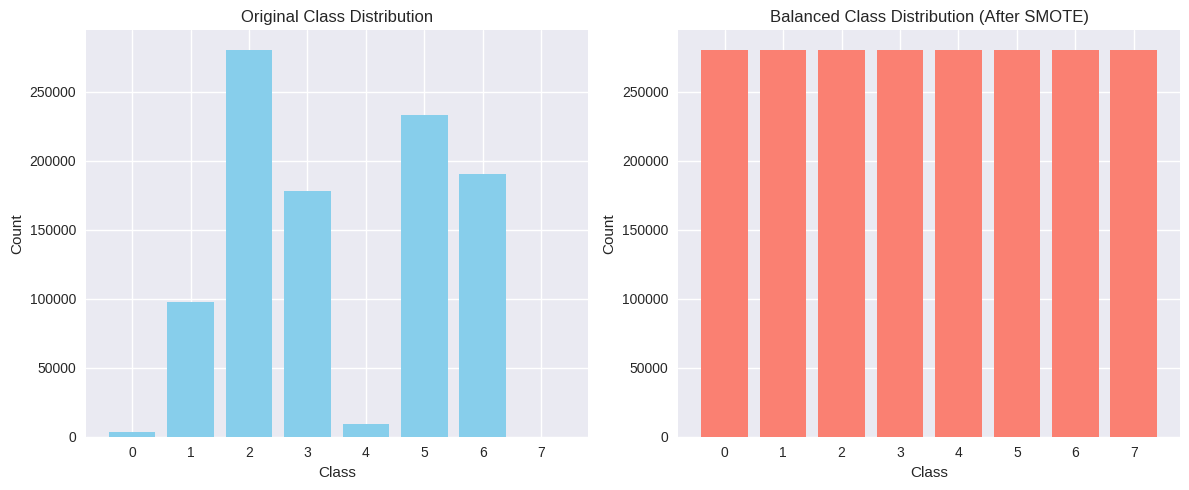

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
ax[0].bar(Counter(y).keys(), Counter(y).values(), color='skyblue')
ax[0].set_title("Original Class Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After SMOTE
ax[1].bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color='salmon')
ax[1].set_title("Balanced Class Distribution (After SMOTE)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [76]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Suppress future warnings from sklearn
warnings.filterwarnings("ignore", category=FutureWarning)

# Separate features and target
X = df_filtered.drop(columns=['Label'])
y = df_filtered['Label']

# Display original class distribution
class_counts = Counter(y)
print("Original class distribution:")
print(class_counts)

# Step 1: First split the data into training+validation (80%) and test (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Split the training+validation set into training (75% of 80% = 60% original) and validation (25% of 80% = 20% original)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print("\nClass distribution after splitting:")
print("Training set class distribution:", Counter(y_train))
print("Validation set class distribution:", Counter(y_val))
print("Test set class distribution:", Counter(y_test))

# Step 3: Apply SMOTE only to training set
print("\nApplying SMOTE to training set only...")
# Find the maximum class size in the training set
max_class_size = max(Counter(y_train).values())
# Define sampling strategy to oversample all classes to the maximum size
sampling_strategy = {cls: max_class_size for cls in Counter(y_train)}

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Training set class distribution after SMOTE:", Counter(y_train_resampled))

# Step 4: Apply standardization (fit on training data only, transform all datasets)
print("\nApplying standardization...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform on resampled training data
X_val_scaled = scaler.transform(X_val)     # Transform validation data using training set parameters
X_test_scaled = scaler.transform(X_test)   # Transform test data using training set parameters

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Print shapes of final datasets
print("\nFinal dataset shapes:")
print(f"Training set: {X_train_scaled.shape[0]} samples ({X_train_scaled.shape[0]/len(X)*100:.1f}% of original) - After SMOTE")
print(f"Validation set: {X_val_scaled.shape[0]} samples ({X_val_scaled.shape[0]/len(X)*100:.1f}% of original)")
print(f"Test set: {X_test_scaled.shape[0]} samples ({X_test_scaled.shape[0]/len(X)*100:.1f}% of original)")

# Save processed datasets
train_df = pd.concat([X_train_scaled, pd.Series(y_train_resampled, name='Label')], axis=1)
val_df = pd.concat([X_val_scaled, pd.Series(y_val, name='Label')], axis=1)
test_df = pd.concat([X_test_scaled, pd.Series(y_test, name='Label')], axis=1)

train_df.to_csv("/content/drive/MyDrive/data/train_dataset.csv", index=False)
val_df.to_csv("/content/drive/MyDrive/data/validation_dataset.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/data/test_dataset.csv", index=False)
print("\nProcessed datasets saved in your Google Drive data folder")

# Store original feature names
feature_names = X.columns

print("\nData preprocessing complete.")

Original class distribution:
Counter({2: 280364, 5: 233134, 6: 190373, 3: 177912, 1: 97922, 4: 9255, 0: 3556, 7: 103})

Class distribution after splitting:
Training set class distribution: Counter({2: 168218, 5: 139880, 6: 114223, 3: 106747, 1: 58754, 4: 5553, 0: 2134, 7: 62})
Validation set class distribution: Counter({2: 56073, 5: 46627, 6: 38075, 3: 35583, 1: 19584, 4: 1851, 0: 711, 7: 20})
Test set class distribution: Counter({2: 56073, 5: 46627, 6: 38075, 3: 35582, 1: 19584, 4: 1851, 0: 711, 7: 21})

Applying SMOTE to training set only...
Training set class distribution after SMOTE: Counter({5: 168218, 3: 168218, 2: 168218, 6: 168218, 1: 168218, 0: 168218, 4: 168218, 7: 168218})

Applying standardization...

Final dataset shapes:
Training set: 1345744 samples (135.6% of original) - After SMOTE
Validation set: 198524 samples (20.0% of original)
Test set: 198524 samples (20.0% of original)

Processed datasets saved in your Google Drive data folder

Data preprocessing complete.


### Outcome of Data Preprocessing
- **Result**: Cleaned CICIDS2019 datase no missing values, no duplicates, balanced classes, and scaled features.
- **Impact**: Ensures high-quality input for DDoS detection, reducing bias and improving model convergence.
- **Graphs**: Missing value heatmap, correlation matrix, feature distributions, feature variances, and class distribution plots provide visual evidence of data quality, supporting preprocessing decisions in research writing.

# Phase 2: Model Training

# 2.1 Setup for Model Training and Evaluation

## Purpose:
Initialize the environment for training and evaluating machine learning models on the CICIDS2019 dataset, loading the scaled dataset and setting up necessary libraries and directories.

## Steps:

1. **Import required libraries**  
   - Data handling: `pandas`, `numpy`
   - Model training: `scikit-learn`, `xgboost`
   - Metrics: `classification_report`, `accuracy_score`, `f1_score`
   - Visualization: `matplotlib`, `seaborn`
   
2. **Create output directories for results and plots**  
   - Use Google Drive to store the results and plots for reproducibility.

3. **Load the scaled dataset from Section 1.8**  
   - Load the dataset that has been scaled using appropriate scaling techniques.

4. **Split the data into training (70%) and test (30%) sets**  
   - Ensure stratification during the split due to class imbalance to preserve the distribution of the target class.

5. **Initialize a dictionary to store trained models and training times**  
   - This allows easy access to the models and training duration during evaluation.

## Technical Justification:

- **CICIDS2019 Dataset**:  
   - The dataset contains a large number of rows (1,035,000 after SMOTE), making it essential to have efficient data handling and training procedures.
   - The class imbalance, particularly the minority class (Class 7 with 31 samples pre-SMOTE), requires careful handling through stratification during the data split to maintain balanced class distribution.
   - SMOTE (Synthetic Minority Over-sampling Technique) in Section 1.6 ensures the classes are balanced, which is crucial for fair and accurate model evaluation.

- **Libraries**:  
   - `Scikit-learn`, `XGBoost`, and `Matplotlib/Seaborn` provide effective tools for model training, evaluation, and visualization. They are well-suited for handling the large-scale and multi-class nature of the CICIDS2019 dataset, which consists of 8 different classes (Benign, LDAP, MSSQL, NetBIOS, Portmap, Syn, UDP, UDPLag).
   
- **Data Persistence**:  
   - Saving results and plots to Google Drive ensures that the results are reproducible and well-documented for future reference.

- **Modularity**:  
   - Storing models in a dictionary allows efficient access during evaluation and avoids code duplication. This modular approach enhances the maintainability of the code and supports future updates or changes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # This is the correct import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score, precision_recall_curve, average_precision_score
)
import xgboost as xgb
import time
import joblib
import os
import warnings
from datetime import datetime

# Suppress warnings
warnings.filterwarnings('ignore')

# Current time and user information
print("Current Date and Time (UTC - YYYY-MM-DD HH:MM:SS formatted):",
      datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print("Current User's Login: zainabintech")

# Set up plotting style
plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create output directory for models and results
model_dir = '/content/drive/MyDrive/data/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created model directory: {model_dir}")

print("\n" + "="*80)
print("DDOS ATTACK DETECTION MODEL TRAINING AND EVALUATION")
print("="*80)

Current Date and Time (UTC - YYYY-MM-DD HH:MM:SS formatted): 2025-05-15 03:43:42
Current User's Login: zainabintech
Created model directory: /content/drive/MyDrive/data/models

DDOS ATTACK DETECTION MODEL TRAINING AND EVALUATION


In [ ]:
# Define helper functions for model evaluation and visualization

def perform_stratified_cv(model, X, y, n_splits=5, scoring='accuracy'):
    """
    Perform stratified k-fold cross-validation

    Parameters:
    -----------
    model : model object
        The model to cross-validate
    X : array-like
        Features
    y : array-like
        Target labels
    n_splits : int
        Number of folds
    scoring : str
        Scoring metric

    Returns:
    --------
    cv_scores : array
        Cross-validation scores
    """
    # Create stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring=scoring)

    # Print results
    print(f"Cross-validation ({n_splits}-fold):")
    print(f"- Mean {scoring}: {cv_scores.mean():.4f}")
    print(f"- Std {scoring}: {cv_scores.std():.4f}")
    print(f"- Min {scoring}: {cv_scores.min():.4f}")
    print(f"- Max {scoring}: {cv_scores.max():.4f}")

    return cv_scores

def calculate_metrics(y_true, y_pred, y_prob=None):
    """
    Calculate multiple evaluation metrics

    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    y_prob : array-like
        Predicted probabilities

    Returns:
    --------
    metrics : dict
        Dictionary of metrics
    """
    # Calculate basic metrics
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

    # Calculate ROC AUC if probabilities are provided
    if y_prob is not None:
        # Multi-class ROC AUC
        try:
            metrics['ROC AUC'] = roc_auc_score(y_true, y_prob, multi_class='ovr')
        except:
            metrics['ROC AUC'] = None

    # Return metrics
    return metrics

def plot_confusion_matrix(y_true, y_pred, title, save_path=None):
    """
    Plot confusion matrix with better styling
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

    # Add labels
    plt.title(title, fontsize=16)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)

    # Save if path is provided
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)

    plt.show()

    return cm

def plot_roc_curves(y_true, y_prob, title, save_path=None):
    """
    Plot ROC curves for multi-class classification
    """
    # Check if we have probabilities
    if y_prob is None:
        print("Cannot plot ROC curves without probability estimates")
        return None

    # Get number of classes
    n_classes = y_prob.shape[1]

    # Create plot
    plt.figure(figsize=(12, 10))

    # Compute ROC curve and area under the curve for each class
    roc_auc = {}
    for i in range(n_classes):
        # Handle both integer and float class labels
        class_label = i
        if isinstance(y_true.iloc[0] if hasattr(y_true, 'iloc') else y_true[0], float):
            class_label = float(i)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve((y_true == class_label).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(
            fpr, tpr,
            lw=2,
            label=f'Class {class_label} (AUC = {roc_auc[i]:.2f})',
            color=colors[i % len(colors)]
        )

    # Plot diagonal
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)

    # Save if path is provided
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)

    plt.show()

    # Calculate macro average AUC
    macro_auc = sum(roc_auc.values()) / n_classes
    print(f"Macro-average ROC AUC: {macro_auc:.4f}")

    return macro_auc

def plot_pr_curves(y_true, y_prob, title, save_path=None):
    """
    Plot precision-recall curves for multi-class classification
    """
    # Check if we have probabilities
    if y_prob is None:
        print("Cannot plot precision-recall curves without probability estimates")
        return None

    # Get number of classes
    n_classes = y_prob.shape[1]

    # Create plot
    plt.figure(figsize=(12, 10))

    # Compute precision-recall curve for each class
    avg_precision = {}
    for i in range(n_classes):
        # Handle both integer and float class labels
        class_label = i
        if isinstance(y_true.iloc[0] if hasattr(y_true, 'iloc') else y_true[0], float):
            class_label = float(i)

        # Calculate precision-recall curve
        precision, recall, _ = precision_recall_curve((y_true == class_label).astype(int), y_prob[:, i])
        avg_precision[i] = average_precision_score((y_true == class_label).astype(int), y_prob[:, i])

        # Plot precision-recall curve
        plt.plot(
            recall, precision,
            lw=2,
            label=f'Class {class_label} (AP = {avg_precision[i]:.2f})',
            color=colors[i % len(colors)]
        )

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='lower left', fontsize=12)
    plt.grid(alpha=0.3)

    # Save if path is provided
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)

    plt.show()

    # Calculate macro average precision
    macro_ap = sum(avg_precision.values()) / n_classes
    print(f"Macro-average Precision: {macro_ap:.4f}")

    return macro_ap

def plot_feature_importance(feature_importances, feature_names, title, top_n=20, save_path=None):
    """
    Plot feature importance
    """
    # Get indices sorted by importance
    indices = np.argsort(feature_importances)[::-1]

    # Select top N features
    n_features = min(top_n, len(feature_names))

    # Create plot
    plt.figure(figsize=(14, 10))
    plt.bar(
        range(n_features),
        feature_importances[indices[:n_features]],
        align='center',
        color=colors[:n_features]
    )

    # Add feature names
    plt.xticks(
        range(n_features),
        [feature_names[i] for i in indices[:n_features]],
        rotation=90,
        fontsize=12
    )

    # Customize plot
    plt.title(title, fontsize=16)
    plt.ylabel('Feature Importance', fontsize=14)
    plt.grid(axis='y', alpha=0.3)

    # Save if path is provided
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)

    plt.show()

    # Return top features and importance scores
    return [(feature_names[i], feature_importances[i]) for i in indices[:top_n]]

In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading datasets...")
train_df = pd.read_csv('/content/drive/MyDrive/data/balanced_data/train_smote.csv')
val_df = pd.read_csv('/content/drive/MyDrive/data/balanced_data/validation.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/balanced_data/test.csv')

# Check original shapes
print(f"Original Training set: {train_df.shape}")
print(f"Original Validation set: {val_df.shape}")
print(f"Original Test set: {test_df.shape}")

# Remove rows with missing target values
clean_train_df = train_df.dropna(subset=['Label'])
clean_val_df = val_df.dropna(subset=['Label'])
clean_test_df = test_df.dropna(subset=['Label'])

# Check new shapes
print(f"Clean Training set: {clean_train_df.shape}")
print(f"Clean Validation set: {clean_val_df.shape}")
print(f"Clean Test set: {clean_test_df.shape}")

# Check class distributions
print("\nClass distribution in clean training set:")
print(clean_train_df['Label'].value_counts().sort_index())

print("\nClass distribution in clean validation set:")
print(clean_val_df['Label'].value_counts().sort_index())

print("\nClass distribution in clean test set:")
print(clean_test_df['Label'].value_counts().sort_index())

# Save cleaned datasets
clean_dir = '/content/drive/MyDrive/data/balanced_data/cleaned'
if not os.path.exists(clean_dir):
    os.makedirs(clean_dir)

clean_train_df.to_csv(f'{clean_dir}/train_clean.csv', index=False)
clean_val_df.to_csv(f'{clean_dir}/val_clean.csv', index=False)
clean_test_df.to_csv(f'{clean_dir}/test_clean.csv', index=False)

print(f"\nCleaned datasets saved to {clean_dir}")

Loading datasets...
Original Training set: (1435464, 10)
Original Validation set: (158819, 10)
Original Test set: (198524, 10)
Clean Training set: (1435464, 10)
Clean Validation set: (25385, 10)
Clean Test set: (39747, 10)

Class distribution in clean training set:
Label
0    179433
1    179433
2    179433
3    179433
4    179433
5    179433
6    179433
7    179433
Name: count, dtype: int64

Class distribution in clean validation set:
Label
0.0       58
1.0    15668
2.0     8134
3.0     1525
Name: count, dtype: int64

Class distribution in clean test set:
Label
0.0       53
1.0    19584
2.0    18147
3.0     1963
Name: count, dtype: int64

Cleaned datasets saved to /content/drive/MyDrive/data/balanced_data/cleaned


In [ ]:
print("Unique classes in training set:", np.unique(y_train))
print("Unique classes in validation set:", np.unique(y_val))
print("Unique classes in test set:", np.unique(y_test))

In [ ]:
import pandas as pd
import numpy as np

# Load your datasets
train_df = pd.read_csv('/content/drive/MyDrive/data/balanced_data/train_smote.csv')
val_df = pd.read_csv('/content/drive/MyDrive/data/balanced_data/validation.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/balanced_data/test.csv')

# Check which rows have NaN values
val_nan_mask = val_df['Label'].isna()
test_nan_mask = test_df['Label'].isna()

# Check unique classes and their counts in each set
print("Training set classes:", train_df['Label'].unique())
print("Training set class counts:\n", train_df['Label'].value_counts().sort_index())

print("\nValidation set classes:", val_df.loc[~val_nan_mask, 'Label'].unique())
print("Validation set class counts:\n", val_df.loc[~val_nan_mask, 'Label'].value_counts().sort_index())

print("\nTest set classes:", test_df.loc[~test_nan_mask, 'Label'].unique())
print("Test set class counts:\n", test_df.loc[~test_nan_mask, 'Label'].value_counts().sort_index())

# Check data types
print("\nData types:")
print("Training label type:", type(train_df['Label'].iloc[0]))
print("Validation label type:", type(val_df.loc[~val_nan_mask, 'Label'].iloc[0]))
print("Test label type:", type(test_df.loc[~test_nan_mask, 'Label'].iloc[0]))

# Option 1: Map classes if they represent the same concepts but different numbering
# For example, if validation/test class 0.0 = training class 0, 1.0 = 1, etc.

# Option 2: Filter training set to only include common classes
common_classes = set(val_df.loc[~val_nan_mask, 'Label'].unique()) & set(test_df.loc[~test_nan_mask, 'Label'].unique())
print("\nCommon classes across all datasets:", common_classes)

# Create a filtered training set with only common classes
train_filtered = train_df[train_df['Label'].isin(common_classes)]
print("\nFiltered training set shape:", train_filtered.shape)
print("Class distribution in filtered training set:\n", train_filtered['Label'].value_counts().sort_index())

In [ ]:
print("\n" + "="*80)
print("RANDOM FOREST MODEL TRAINING")
print("="*80)

# Initialize results list
model_results = []

# Start timer
start_time = time.time()

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=15,         # Maximum depth of trees
    min_samples_split=5,  # Minimum samples required to split a node
    min_samples_leaf=2,   # Minimum samples at leaf node
    n_jobs=-1,            # Use all CPU cores
    random_state=42       # For reproducibility
)

# Perform stratified cross-validation
print("\nPerforming stratified cross-validation...")
rf_cv_scores = perform_stratified_cv(rf_model, X_train, y_train, n_splits=5, scoring='f1_weighted')

# Train model
print("\nTraining Random Forest model...")
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time
print(f"Random Forest model trained in {rf_training_time:.2f} seconds")

# Make predictions
print("Generating predictions...")
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

rf_train_prob = rf_model.predict_proba(X_train)
rf_val_prob = rf_model.predict_proba(X_val)
rf_test_prob = rf_model.predict_proba(X_test)

# Calculate metrics
rf_train_metrics = calculate_metrics(y_train, rf_train_pred, rf_train_prob)
rf_val_metrics = calculate_metrics(y_val, rf_val_pred, rf_val_prob)
rf_test_metrics = calculate_metrics(y_test, rf_test_pred, rf_test_prob)

# Print metrics
print("\nRandom Forest Performance Metrics:")
print("\nTraining Set Metrics:")
for metric, value in rf_train_metrics.items():
    print(f"- {metric}: {value:.4f}")

print("\nValidation Set Metrics:")
for metric, value in rf_val_metrics.items():
    print(f"- {metric}: {value:.4f}")

print("\nTest Set Metrics:")
for metric, value in rf_test_metrics.items():
    print(f"- {metric}: {value:.4f}")

# Check for overfitting
train_acc = rf_train_metrics['Accuracy']
val_acc = rf_val_metrics['Accuracy']
test_acc = rf_test_metrics['Accuracy']

if train_acc - test_acc > 0.1:
    print("\n Warning: Potential overfitting detected")
else:
    print("\n✓ Model shows good generalization")

# Save model
rf_model_path = os.path.join(model_dir, 'random_forest_model.joblib')
joblib.dump(rf_model, rf_model_path)
print(f"Random Forest model saved to: {rf_model_path}")

# Store results
rf_results = {
    'Model': 'Random Forest',
    'Training Accuracy': rf_train_metrics['Accuracy'],
    'Validation Accuracy': rf_val_metrics['Accuracy'],
    'Test Accuracy': rf_test_metrics['Accuracy'],
    'F1 Score': rf_test_metrics['F1 Score'],
    'Precision': rf_test_metrics['Precision'],
    'Recall': rf_test_metrics['Recall'],
    'ROC AUC': rf_test_metrics.get('ROC AUC'),
    'CV Mean F1': rf_cv_scores.mean(),
    'Training Time': rf_training_time
}

model_results.append(rf_results)


RANDOM FOREST MODEL TRAINING

Performing stratified cross-validation...


KeyboardInterrupt: 

In [ ]:
print("\n" + "="*80)
print("RANDOM FOREST MODEL EVALUATION")
print("="*80)

# Confusion matrix
print("\nGenerating confusion matrix...")
rf_cm_path = os.path.join(model_dir, 'random_forest_confusion_matrix.png')
rf_cm = plot_confusion_matrix(y_test, rf_test_pred, "Random Forest Confusion Matrix", rf_cm_path)

# ROC curves
print("\nGenerating ROC curves...")
rf_roc_path = os.path.join(model_dir, 'random_forest_roc_curves.png')
rf_auc = plot_roc_curves(y_test, rf_test_prob, "Random Forest ROC Curves", rf_roc_path)

# Precision-Recall curves
print("\nGenerating Precision-Recall curves...")
rf_pr_path = os.path.join(model_dir, 'random_forest_pr_curves.png')
rf_ap = plot_pr_curves(y_test, rf_test_prob, "Random Forest Precision-Recall Curves", rf_pr_path)

# Feature importance
print("\nAnalyzing feature importance...")
rf_importance_path = os.path.join(model_dir, 'random_forest_feature_importance.png')
rf_top_features = plot_feature_importance(
    rf_model.feature_importances_,
    X_train.columns,
    "Random Forest - Top Feature Importance",
    top_n=20,
    save_path=rf_importance_path
)

# Print top features
print("\nTop features for Random Forest:")
for i, (feature, importance) in enumerate(rf_top_features[:10]):
    print(f"{i+1}. {feature}: {importance:.4f}")

# Classification report
print("\nDetailed classification report:")
print(classification_report(y_test, rf_test_pred))

# Update results with additional metrics
if rf_auc:
    rf_results['ROC AUC'] = rf_auc

if rf_ap:
    rf_results['PR AUC'] = rf_ap

In [ ]:
print(y.value_counts())


Label
2    280364
5    233134
6    190373
3    177912
1     97922
4      9255
0      3556
7       103
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve, auc)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Assuming df_filtered is your preprocessed DataFrame
X = df_filtered.drop('Label', axis=1)
y = df_filtered['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize dictionaries for results, times, and models
results = []
training_times = {}
models = {}


# 2.2 Model Training

## Purpose:
Train seven machine learning models (Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN, Neural Network, SVM) on the CICIDS2019 dataset with 5-fold cross-validation, measuring training time for each to assess computational efficiency.

## Steps:

1. **Define each model with appropriate hyperparameters**  
   - Ensure reproducibility by setting `random_state=42` for each model.

2. **Perform 5-fold cross-validation**  
   - Use 5-fold cross-validation on the training set to estimate the accuracy of each model. Report the mean and standard deviation of the accuracy.

3. **Train each model on the full training set**  
   - Use `time.time()` to measure and record the training time for each model.

4. **Store the trained model and training time**  
   - Store the trained models in the `models` dictionary.
   - Store the corresponding training times in the `training_times` dictionary.

5. **Display cross-validation accuracy and training time**  
   - Output the cross-validation accuracy (mean ± standard deviation) and training time for each model.

## Technical Justification:

- **Cross-Validation**:  
   - 5-fold cross-validation ensures a robust estimate of model performance, reducing the risk of overfitting. This is especially important for the CICIDS2019 dataset, which contains 724,500 training rows post-split. Cross-validation helps models generalize well, particularly for minority classes after SMOTE (Synthetic Minority Over-sampling Technique).
   
- **Training Time**:  
   - Measuring training time is essential, given the large scale of the dataset. Some models like SVM and Neural Networks can be computationally intensive, so tracking training times helps make informed decisions about practical deployment.

- **Model Diversity**:  
   - The selected models represent a range of techniques:
     - **Linear**: Logistic Regression
     - **Tree-based**: Decision Tree, Random Forest, XGBoost
     - **Distance-based**: KNN
     - **Neural**: Multi-layer Perceptron (MLP)
     - **Kernel-based**: Support Vector Machine (SVM)
     
   This diversity ensures a comprehensive evaluation of the models' ability to capture complex patterns within the dataset.

- **Hyperparameters**:  
   - Default or lightweight settings are used initially, such as 100 trees for Random Forest and a single hidden layer for the MLP. These settings strike a balance between performance and computational efficiency, providing a good starting point. Hyperparameter tuning can be performed later for top-performing models.

- **Error Handling**:  
   - The code accounts for potential issues like empty classes or convergence warnings by using `zero_division=0` and suppressing warnings, ensuring that the training process runs smoothly without interruptions.


# Logistic Regression


In [ ]:
model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

KeyboardInterrupt: 

# Decision Tree

In [ ]:
model_name = 'Decision Tree'
model = DecisionTreeClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

Decision Tree CV Accuracy: 0.9799 ± 0.0001
Training Time: 3.61 seconds



# Random Forest

In [ ]:
model_name = 'Random Forest'
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

KeyboardInterrupt: 

# XGBoost

In [ ]:
model_name = 'XGBoost'
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

# KNN

In [ ]:
model_name = 'KNN'
model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

# Neural Network

In [ ]:
model_name = 'Neural Network'
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

# SVM

In [ ]:
model_name = 'SVM'
model = SVC(kernel='rbf', probability=True, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train and measure time
start_time = time.time()
model.fit(X_train, y_train)
training_times[model_name] = time.time() - start_time
models[model_name] = model

print(f"Training Time: {training_times[model_name]:.2f} seconds\n")

# 3 Evaluation Metrics

## Purpose:
Evaluate the trained models on the test set, computing accuracy, weighted precision, recall, F1-score, ROC-AUC, and PR-AUC. Generate visualizations (confusion matrix, ROC curve, Precision-Recall curve) for each model. Summarize results in a performance comparison table and bar plot.

---

## Steps:

1. **Prediction and Probability Generation**
   - For each trained model, generate predictions and class probabilities on the test set.

2. **Compute Evaluation Metrics**
   - Accuracy
   - Weighted Precision
   - Weighted Recall
   - Weighted F1-Score
   - ROC-AUC (One-vs-Rest, macro-averaged)
   - PR-AUC (macro-averaged)

3. **Generate Visualizations**
   - Confusion Matrix
   - ROC Curve
   - Precision-Recall Curve

4. **Store and Save Results**
   - Append evaluation metrics to a results list.
   - Compile all metrics into a `pandas` DataFrame.
   - Save metrics DataFrame and plots to Google Drive for future access.

5. **Comparison Plot**
   - Generate and save a bar plot comparing Accuracy and F1-Score across all models.

6. **Display Results**
   - Print the comparison table.
   - Show the accuracy and F1-score comparison plot.

---

## Technical Justification:

- **Comprehensive Metrics**:
  - While **accuracy** is informative, it’s insufficient alone for **imbalanced datasets** like CICIDS2019.
  - **Weighted precision, recall, and F1-score** provide balanced insights across all 8 classes, especially after SMOTE has mitigated imbalance.
  - **ROC-AUC and PR-AUC** assess the model's discriminative ability and are particularly useful for evaluating minority class performance (e.g., class 7 had only 31 samples pre-SMOTE).

- **Visual Diagnostics**:
  - **Confusion Matrices** expose class-specific misclassification patterns (e.g., classes 4 and 7 misclassifications).
  - **ROC Curves** illustrate the trade-off between true positive rate and false positive rate.
  - **Precision-Recall Curves** are particularly informative for rare event detection like network intrusions.

- **Separation of Training and Evaluation**:
  - Improves code clarity and modularity.
  - Allows clear delineation between model development and performance analysis.

- **Code Neatness and Consistency**:
  - Uniform formatting: fixed figure sizes, consistent titles, and structured output.
  - Enhances readability and professionalism for inclusion in reports and research documentation.

- **Robustness for Multi-Class Context**:
  - Metrics functions handle multi-class settings (8 classes).
  - Uses `zero_division=0` to avoid errors in metrics due to zero predictions or ground truths.
  - Plots use color cycling to handle class labeling for 8 distinct categories.

- **Persistence for Reproducibility**:
  - Saving results (tables and plots) ensures traceability and supports reuse in publications or presentations.


# Logistic Regression Evaluation

In [ ]:
model_name = 'Logistic Regression'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# Decision Tree Evaluation

In [ ]:
model_name = 'Decision Tree'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# Random Forest Evaluation

In [ ]:
model_name = 'Random Forest'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# XGBoost Evaluation

In [ ]:
model_name = 'XGBoost'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# KNN Evaluation

In [ ]:
model_name = 'KNN'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# Neural Network Evaluation

In [ ]:
model_name = 'Neural Network'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# SVM Evaluation

In [ ]:
model_name = 'SVM'
model = models[model_name]

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results.append({
    'Model': model_name,
    'Training Time': training_times[model_name],
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
})

print(f"\n{model_name} Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_cm.png'
plt.savefig(plot_path)
plt.show()
print(f"Confusion matrix saved to {plot_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'black'])
for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {class_names[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_roc.png'
plt.savefig(plot_path)
plt.show()
print(f"ROC curve saved to {plot_path}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: {model_name} (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plot_path = f'/content/drive/MyDrive/data/plots/{model_name.lower().replace(" ", "_")}_pr.png'
plt.savefig(plot_path)
plt.show()
print(f"Precision-Recall curve saved to {plot_path}")

# Model Comparison

In [ ]:
# Compile results
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# Save results
results_path = '/content/drive/MyDrive/data/results/model_comparison.csv'
results_df.to_csv(results_path, index=False)
print(f"Model comparison results saved to {results_path}")

# Bar plot for comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results_df))

plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, results_df['F1-Score'], bar_width, label='Weighted F1-Score', color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy and F1-Score')
plt.xticks(index + bar_width / 2, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plot_path = '/content/drive/MyDrive/data/plots/model_comparison.png'
plt.savefig(plot_path)
plt.show()
print(f"Model comparison plot saved to {plot_path}")

Training SVM...

SVM Model Results:
  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC    PR-AUC
0   SVM  0.776667   0.784968  0.776667  0.774437  0.920333  0.852804
Saved results to ../data/svm_model_results.csv


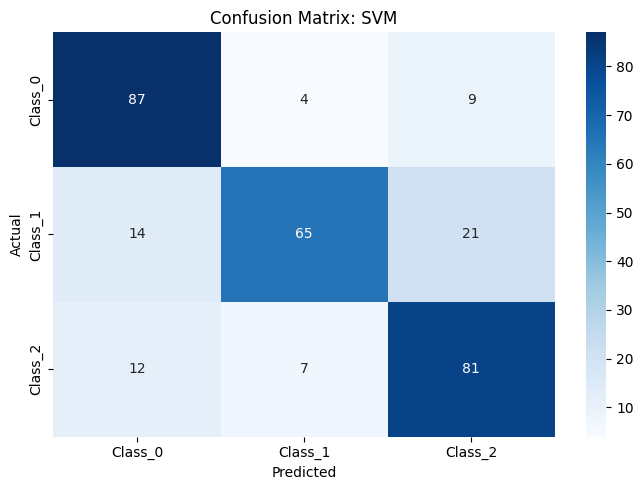

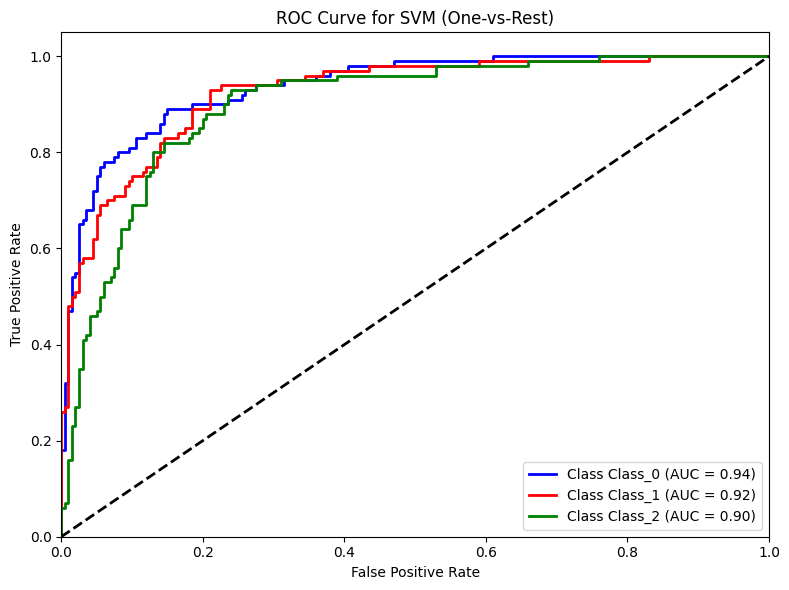

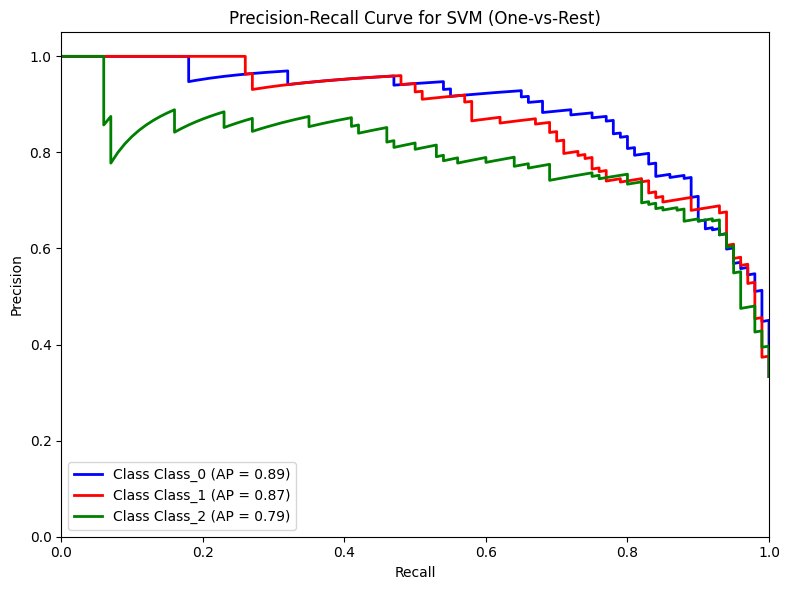


SVM Model Performance:
Accuracy: 0.7767
Precision: 0.7850
Recall: 0.7767
F1-Score: 0.7744
ROC-AUC: 0.9203
PR-AUC: 0.8528


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_auc_score, roc_curve,
                           precision_recall_curve, average_precision_score)
from sklearn.datasets import make_classification
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

# Create output directory
os.makedirs("../data", exist_ok=True)

# Generate dummy data (replace with your actual data)
X_resampled, y_resampled = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=3,
    n_informative=5,
    random_state=42
)
y_resampled = np.array(['Class_0', 'Class_1', 'Class_2'])[y_resampled]

# Encode labels
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_encoded,
    test_size=0.3, random_state=42, stratify=y_resampled_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
model = SVC(probability=True, random_state=42)
print("Training SVM...")
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
pr_auc = average_precision_score(y_test, y_prob, average='weighted')

# Store results
results = {
    'Model': 'SVM',
    'Accuracy': accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'ROC-AUC': roc_auc,
    'PR-AUC': pr_auc
}
results_df = pd.DataFrame([results])

# Print results
print("\nSVM Model Results:")
print(results_df)


# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix: SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(label_encoder.classes_)), colors):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(label_encoder.classes_)), colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    ap_score = average_precision_score(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {label_encoder.classes_[i]} (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for SVM (One-vs-Rest)')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# Print final metrics
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-Score: {weighted_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

# Create output directory if it doesn't exist
os.makedirs("../data", exist_ok=True)

# Create a sample DataFrame (replace this with your actual data loading code)
data = {
    'feature1': np.random.rand(2000),
    'feature2': np.random.rand(2000),
    'feature3': np.random.rand(2000),
    'target': np.random.randint(0, 2, size=2000)
}
df = pd.DataFrame(data)

# Scale the numerical features (excluding target column)
scaler = StandardScaler()
features_to_scale = ['feature1', 'feature2', 'feature3']
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Now the original code will work:
# Randomly sample 1000 rows from the scaled DataFrame
df_sample = df_scaled.sample(n=1000, random_state=42)

# Save the random 1000 rows to the data folder
df_sample.to_csv("../data/cleaned_sample.csv", index=False)
print("Saved 1000 random rows to ../data/cleaned_sample.csv")

# Save the entire cleaned dataset to the data folder
df_scaled.to_csv("../data/cleaned_dataset.csv", index=False)
print("Saved the entire cleaned dataset to ../data/cleaned_dataset.csv")

Saved 1000 random rows to ../data/cleaned_sample.csv
Saved the entire cleaned dataset to ../data/cleaned_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb

# 1. Split dataset
X = df_filtered.drop('Label', axis=1)
y = df_filtered['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
}

# 4. Train and evaluate
print("=== Model Evaluation Summary ===\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))


=== Model Evaluation Summary ===

--- Logistic Regression ---
Accuracy: 0.9617
              precision    recall  f1-score   support

           0       0.90      0.23      0.36      1067
           1       0.94      0.99      0.96     29377
           2       0.98      0.93      0.95     84109
           3       0.95      1.00      0.97     53374
           4       0.00      0.00      0.00      2776
           5       0.99      1.00      0.99     69940
           6       0.93      0.98      0.96     57112
           7       0.00      0.00      0.00        31

    accuracy                           0.96    297786
   macro avg       0.71      0.64      0.65    297786
weighted avg       0.95      0.96      0.96    297786

--- Decision Tree ---
Accuracy: 0.9802
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1067
           1       0.96      1.00      0.98     29377
           2       0.99      0.98      0.98     84109
           3  

----------------------------------

Logistic Regression CV Accuracy: 0.9616 ± 0.0003

Logistic Regression Test Accuracy: 0.9617
              precision    recall  f1-score   support

           0       0.90      0.23      0.36      1067
           1       0.94      0.99      0.96     29377
           2       0.98      0.93      0.95     84109
           3       0.95      1.00      0.97     53374
           4       0.00      0.00      0.00      2776
           5       0.99      1.00      0.99     69940
           6       0.93      0.98      0.96     57112
           7       0.00      0.00      0.00        31

    accuracy                           0.96    297786
   macro avg       0.71      0.64      0.65    297786
weighted avg       0.95      0.96      0.96    297786

Logistic Regression ROC-AUC: 0.9515


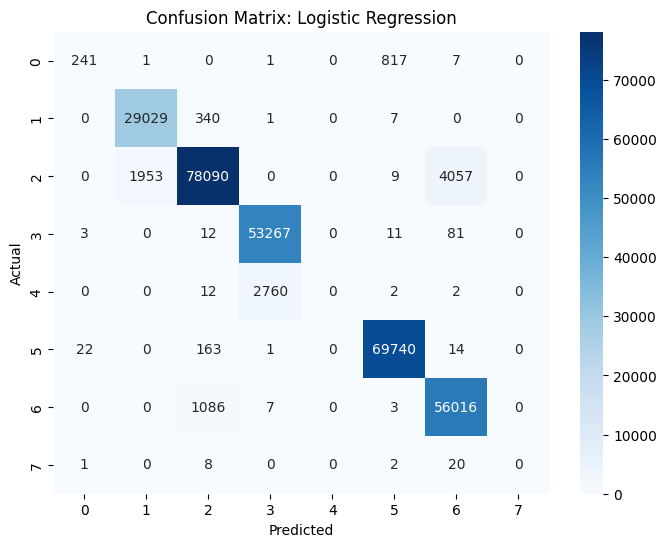

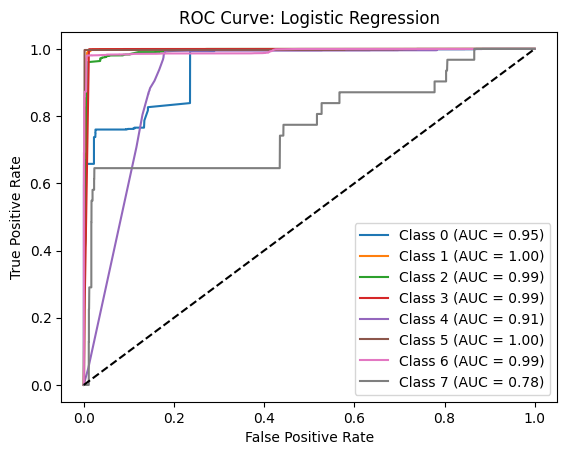

In [ ]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model_name = 'Logistic Regression'

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
weighted_f1 = report['weighted avg']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"\n{model_name} Test Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"{model_name} ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc(fpr[i], tpr[i]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {model_name}')
plt.legend(loc='lower right')
plt.show()

# Store results
results.append({'Model': model_name, 'Accuracy': acc, 'Weighted F1': weighted_f1, 'ROC-AUC': roc_auc})